# LUNG CANCER PREDICTION

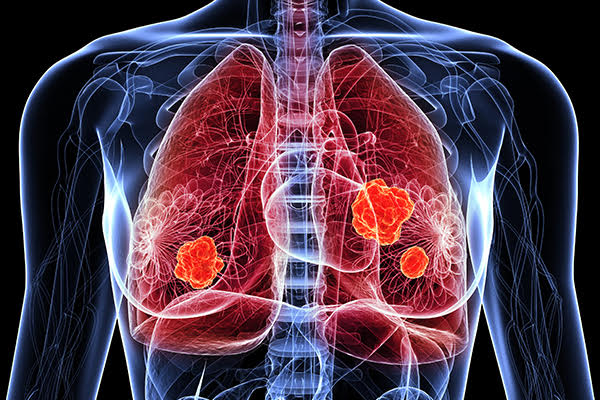

#### IMPORTING LIBRARIES

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
sns.set()

## DATA CLEANING

#### LOADING DATA

In [209]:
dataset=pd.read_csv("cancer patient data sets.csv")


#### REMOVING UNNECCESSARY COLUMNS

In [210]:
dataset=dataset[dataset.columns.difference(['index','Patient Id'])]
dataset

,Age,Air Pollution,Alcohol use,Balanced Diet,Chest Pain,Clubbing of Finger Nails,Coughing of Blood,Dry Cough,Dust Allergy,Fatigue,...,Obesity,OccuPational Hazards,Passive Smoker,Shortness of Breath,Smoking,Snoring,Swallowing Difficulty,Weight Loss,Wheezing,chronic Lung Disease
0,33,2,4,2,2,1,4,3,5,3,...,4,4,2,2,3,4,3,4,2,2
1,17,3,1,2,2,2,3,7,5,1,...,2,3,4,7,2,2,6,3,8,2
2,35,4,5,6,4,4,8,7,6,8,...,7,5,3,9,2,2,1,7,2,4
3,37,7,7,7,7,5,8,7,7,4,...,7,7,7,3,7,5,4,2,1,7
4,46,6,8,7,7,2,9,2,7,3,...,7,7,7,4,8,3,4,2,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,23,4,2,2,2,2,4,3,3,1,...,4,4,4,4,2,1,4,3,2,3
1091,24,3,2,1,3,2,6,1,2,2,...,1,1,2,2,4,1,4,1,3,1
1092,35,2,1,2,2,2,1,2,2,3,...,3,1,4,5,2,2,3,4,1,1
1093,38,5,2,5,1,3,3,4,3,1,...,2,1,5,1,2,2,1,1,1,3


#### INFORMATION ABOUT DATA

In [211]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1095 non-null   int64 
 1   Air Pollution             1095 non-null   int64 
 2   Alcohol use               1095 non-null   int64 
 3   Balanced Diet             1095 non-null   int64 
 4   Chest Pain                1095 non-null   int64 
 5   Clubbing of Finger Nails  1095 non-null   int64 
 6   Coughing of Blood         1095 non-null   int64 
 7   Dry Cough                 1095 non-null   int64 
 8   Dust Allergy              1095 non-null   int64 
 9   Fatigue                   1095 non-null   int64 
 10  Frequent Cold             1095 non-null   int64 
 11  Gender                    1095 non-null   int64 
 12  Genetic Risk              1095 non-null   int64 
 13  Level                     1095 non-null   object
 14  Obesity                 

All columns are not having any Null Entries,All columns except one are numerical type,Only Single column categorical type

In [212]:
dataset.describe()

,Age,Air Pollution,Alcohol use,Balanced Diet,Chest Pain,Clubbing of Finger Nails,Coughing of Blood,Dry Cough,Dust Allergy,Fatigue,...,Obesity,OccuPational Hazards,Passive Smoker,Shortness of Breath,Smoking,Snoring,Swallowing Difficulty,Weight Loss,Wheezing,chronic Lung Disease
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,...,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,37.046575,3.739726,4.419178,4.377169,4.325114,3.872146,4.718721,3.772603,5.042009,3.745205,...,4.319635,4.742466,4.057534,4.160731,3.833790,2.873973,3.721461,3.802740,3.736073,4.312329
std,11.946813,2.020196,2.623651,2.134686,2.288645,2.384077,2.417442,2.015565,2.026801,2.210973,...,2.122425,2.122693,2.284071,2.282937,2.458383,1.470803,2.258853,2.216234,2.002906,1.859111
min,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,35.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,5.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,45.000000,6.000000,7.000000,7.000000,7.000000,5.000000,7.000000,5.000000,7.000000,5.000000,...,7.000000,7.000000,7.000000,6.000000,7.000000,4.000000,5.000000,6.000000,5.000000,6.000000
max,73.000000,8.000000,8.000000,7.000000,9.000000,9.000000,9.000000,7.000000,8.000000,9.000000,...,7.000000,8.000000,8.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,7.000000


In [213]:
dataset['Level'].value_counts()

Low       365
Medium    365
High      365
Name: Level, dtype: int64

In [217]:
dataset.groupby('Level').agg(['mean', 'median'])

Age        Air Pollution        Alcohol use         \
             mean median          mean median        mean median   
Level                                                              
High    37.320548   36.0      5.693151    6.0    6.830137    7.0   
Low     35.145205   33.0      2.602740    2.0    2.235616    2.0   
Medium  38.673973   38.0      2.923288    2.0    4.191781    4.0   

       Balanced Diet        Chest Pain         ...   Snoring         \
                mean median       mean median  ...      mean median   
Level                                          ...                    
High        6.619178    7.0   6.391781    7.0  ...  3.227397    3.0   
Low         3.016438    3.0   2.846575    2.0  ...  2.093151    2.0   
Medium      3.495890    3.0   3.736986    3.0  ...  3.301370    3.0   

       Swallowing Difficulty        Weight Loss         Wheezing         \
                        mean median        mean median      mean median   
Level                                                                     
High                4.189041    4.0    4.468493    5.0  3.884932    2.0   
Low                 2.805479    2.0    2.498630    2.0  2.553425    2.0   
Medium              4.169863    4.0    4.441096    5.0  4.769863    5.0   

       chronic Lung Disease         
                       mean median  
Level                               
High               5.827397    6.0  
Low                3.147945    3.0  
Medium             3.961644    4.0  

[3 rows x 46 columns]

In [218]:
dataset[dataset.duplicated()]

,Age,Air Pollution,Alcohol use,Balanced Diet,Chest Pain,Clubbing of Finger Nails,Coughing of Blood,Dry Cough,Dust Allergy,Fatigue,...,Obesity,OccuPational Hazards,Passive Smoker,Shortness of Breath,Smoking,Snoring,Swallowing Difficulty,Weight Loss,Wheezing,chronic Lung Disease
5,35,4,5,6,4,4,8,7,6,8,...,7,5,3,9,2,2,1,7,2,4
16,17,3,1,2,2,2,3,7,5,1,...,2,3,4,7,2,2,6,3,8,2
17,34,6,7,7,7,5,8,7,7,4,...,7,7,7,3,7,5,4,2,1,7
24,36,6,7,6,7,8,7,6,7,8,...,7,7,7,7,7,2,7,5,6,7
33,33,2,4,2,2,1,4,3,5,3,...,4,4,2,2,3,4,3,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,23,4,2,2,2,2,4,3,3,1,...,4,4,4,4,2,1,4,3,2,3
1091,24,3,2,1,3,2,6,1,2,2,...,1,1,2,2,4,1,4,1,3,1
1092,35,2,1,2,2,2,1,2,2,3,...,3,1,4,5,2,2,3,4,1,1
1093,38,5,2,5,1,3,3,4,3,1,...,2,1,5,1,2,2,1,1,1,3


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,age,air_pollution,alcohol_use,balanced_diet,chest_pain,clubbing_of_finger_nails,coughing_of_blood,dry_cough,dust_allergy,fatigue,...,obesity,occupational_hazards,passive_smoker,shortness_of_breath,smoking,snoring,swallowing_difficulty,weight_loss,wheezing,chronic_lung_disease
0,33,2,4,2,2,1,4,3,5,3,...,4,4,2,2,3,4,3,4,2,2
1,17,3,1,2,2,2,3,7,5,1,...,2,3,4,7,2,2,6,3,8,2
2,35,4,5,6,4,4,8,7,6,8,...,7,5,3,9,2,2,1,7,2,4
3,37,7,7,7,7,5,8,7,7,4,...,7,7,7,3,7,5,4,2,1,7
4,46,6,8,7,7,2,9,2,7,3,...,7,7,7,4,8,3,4,2,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,23,4,2,2,2,2,4,3,3,1,...,4,4,4,4,2,1,4,3,2,3
1091,24,3,2,1,3,2,6,1,2,2,...,1,1,2,2,4,1,4,1,3,1
1092,35,2,1,2,2,2,1,2,2,3,...,3,1,4,5,2,2,3,4,1,1
1093,38,5,2,5,1,3,3,4,3,1,...,2,1,5,1,2,2,1,1,1,3


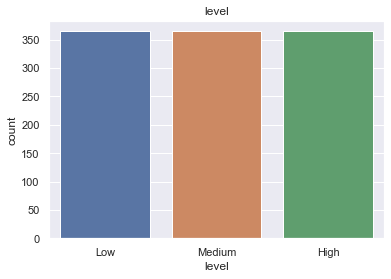

In [219]:
dataset.rename(columns=str.lower, inplace=True)
dataset.rename(columns={col: col.replace(" ", "_") for col in dataset.columns}, inplace=True)
plt.title('level')
sns.countplot(dataset['level'])
dataset


### DATA VISUALIZATION AND ANALYSIS 

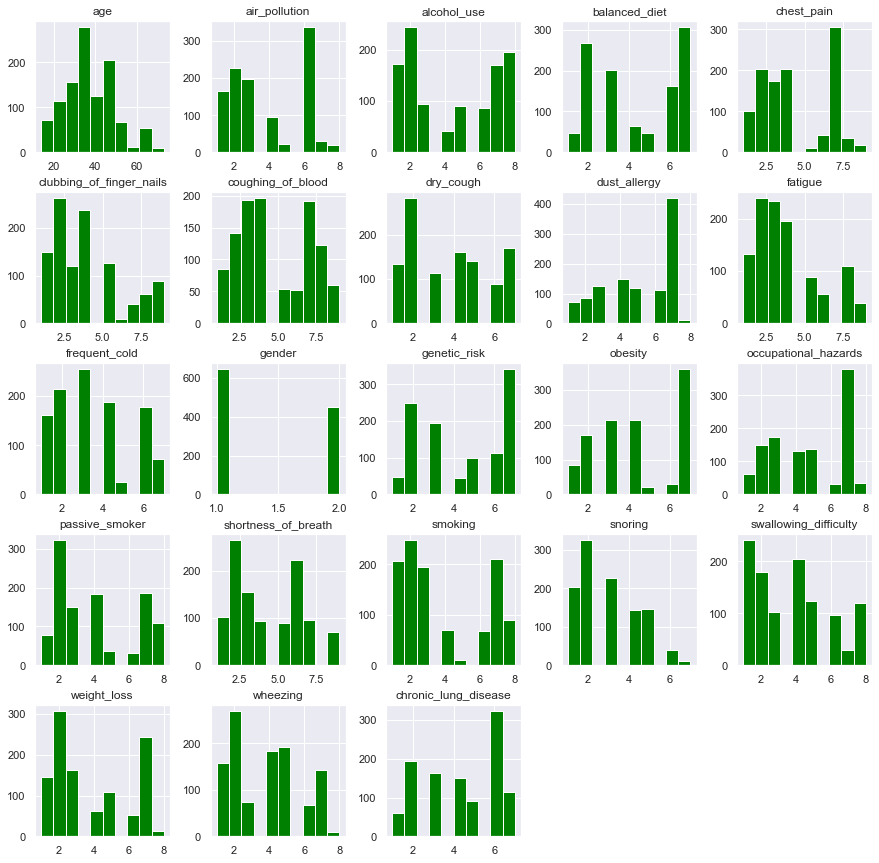

In [220]:

df= dataset.hist(figsize=(15, 15),color='green')

THE PLOTS ABOVE IS THE COUNT ANALYSIS OF EACH FEATURE 

### DENSITY ANALYSIS OF AGE

<AxesSubplot:xlabel='age', ylabel='Density'>

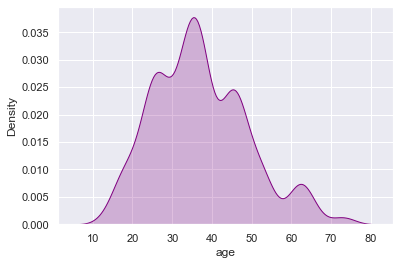

In [221]:
sns.kdeplot(dataset.age, shade = True, color = "purple")

THE GRAPH ABOVE IS SHOWING THAT BETWEEN 30 & 40 THE DENSITY INCREASES

### COUNT ANALYSIS OF SMOKERS AND PASSIVE SMOKERS

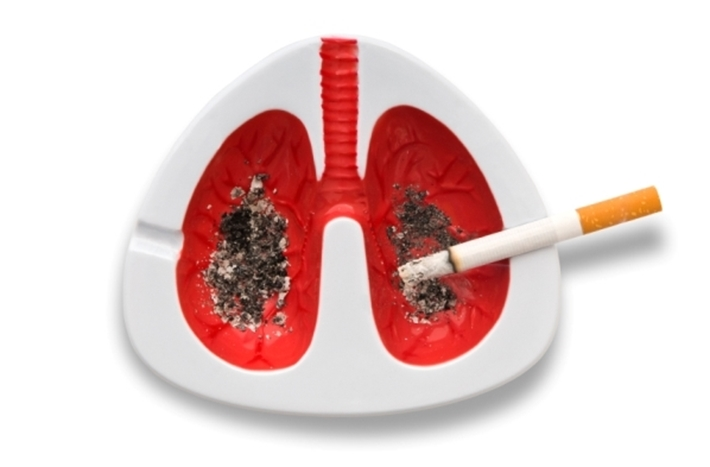

<AxesSubplot:title={'center':'Number of Smokers'}, xlabel='smoking', ylabel='Count'>

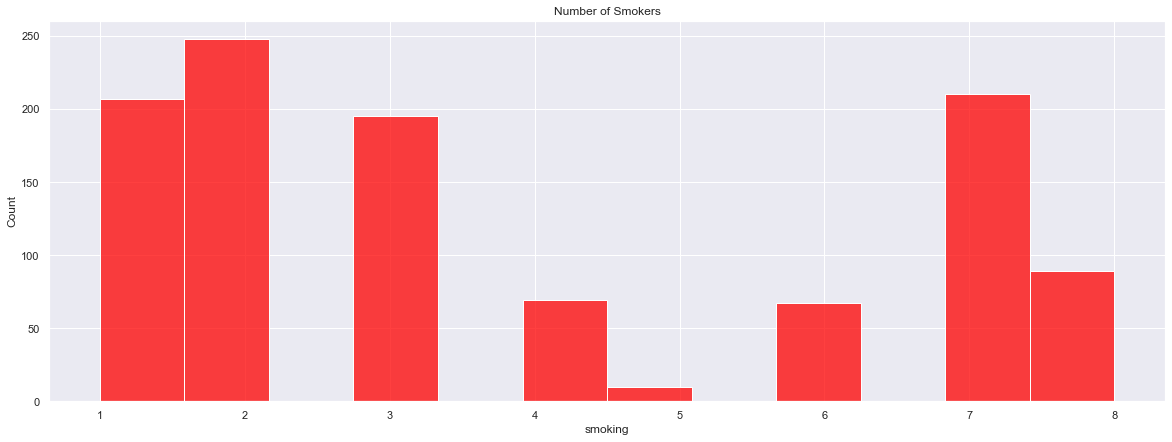

In [222]:
plt.subplots(figsize=(20, 7))
plt.title("Number of Smokers")
sns.histplot(data=dataset, x=dataset["smoking"],color='red')

THE GRAPH ABOVE IS COUNT ANALYSIS OF SMOKERS

<AxesSubplot:title={'center':'Number of Passive Smokers'}, xlabel='passive_smoker', ylabel='Count'>

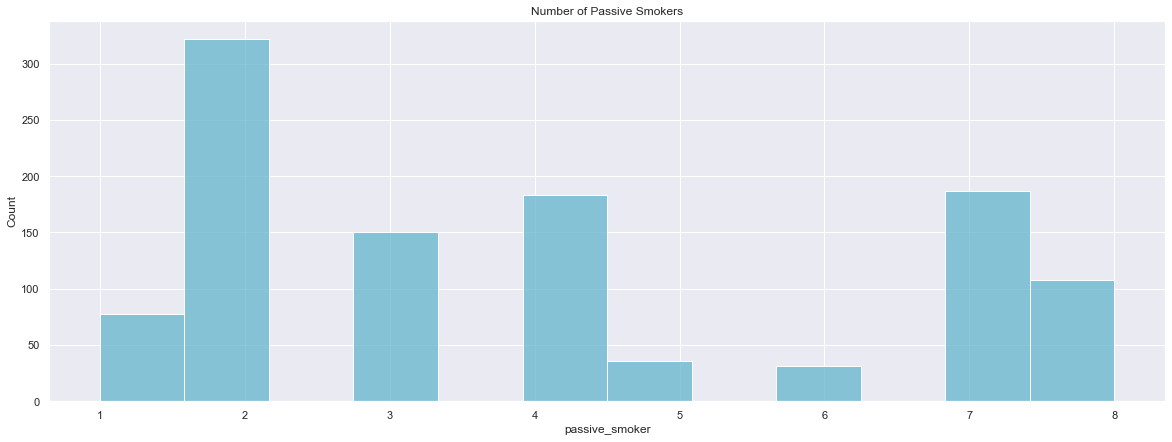

In [223]:
plt.subplots(figsize=(20, 7))
plt.title("Number of Passive Smokers")
sns.histplot(data=dataset, x=dataset["passive_smoker"],color='c')

THE GRAPH ABOVE IS COUNT ANALYSIS OF PASSIVE SMOKERS

### CORRELATION

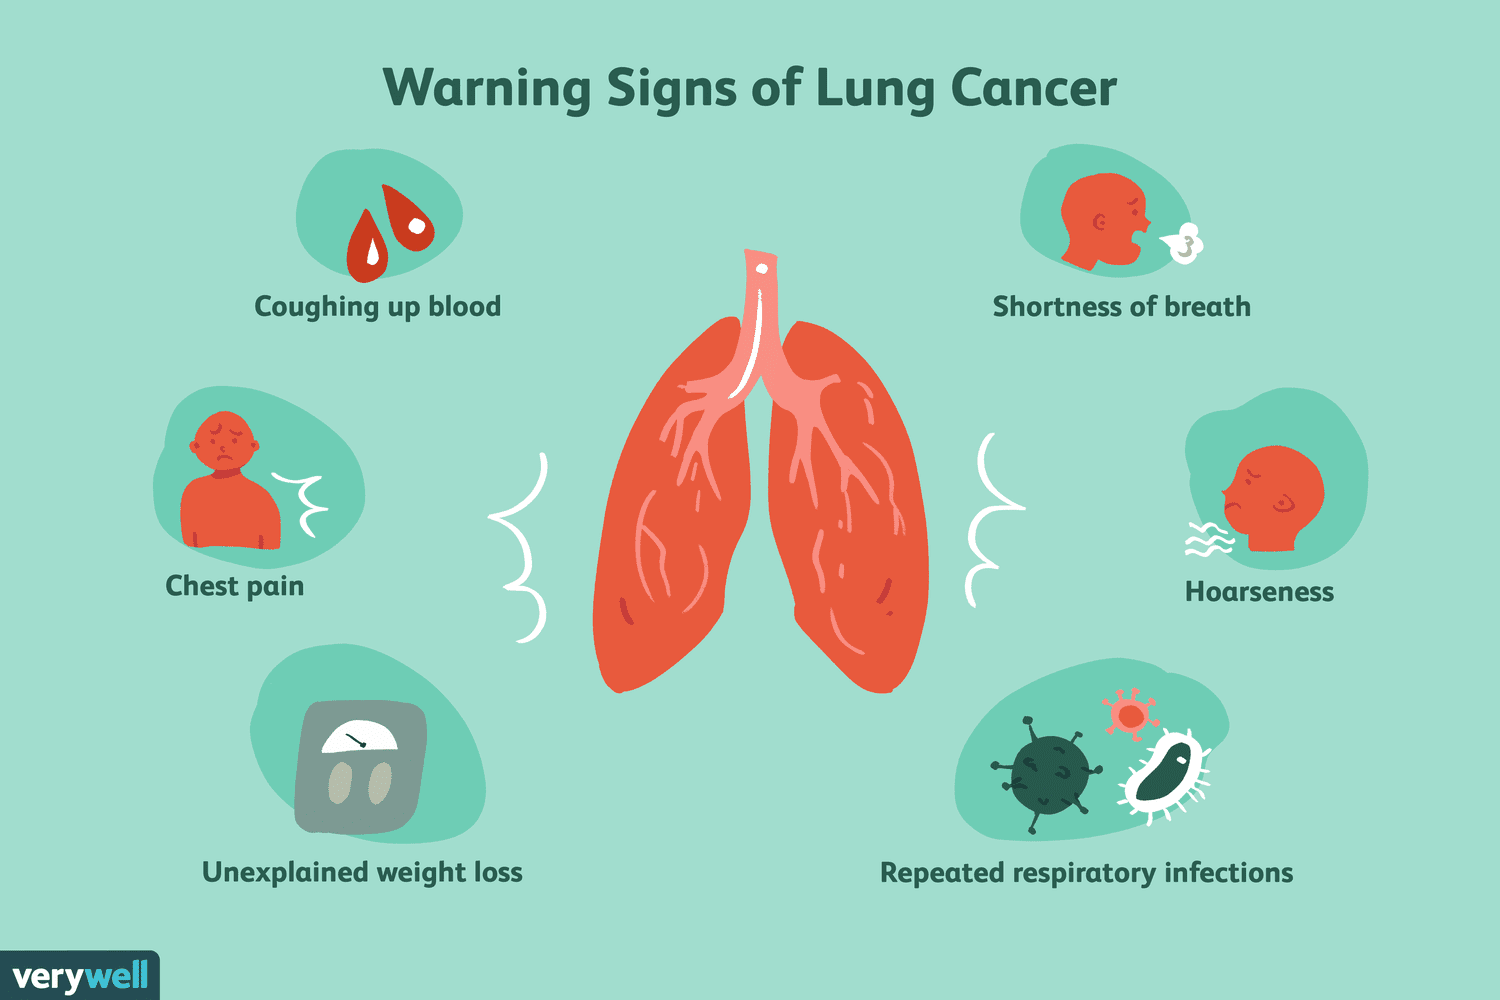

<AxesSubplot:>

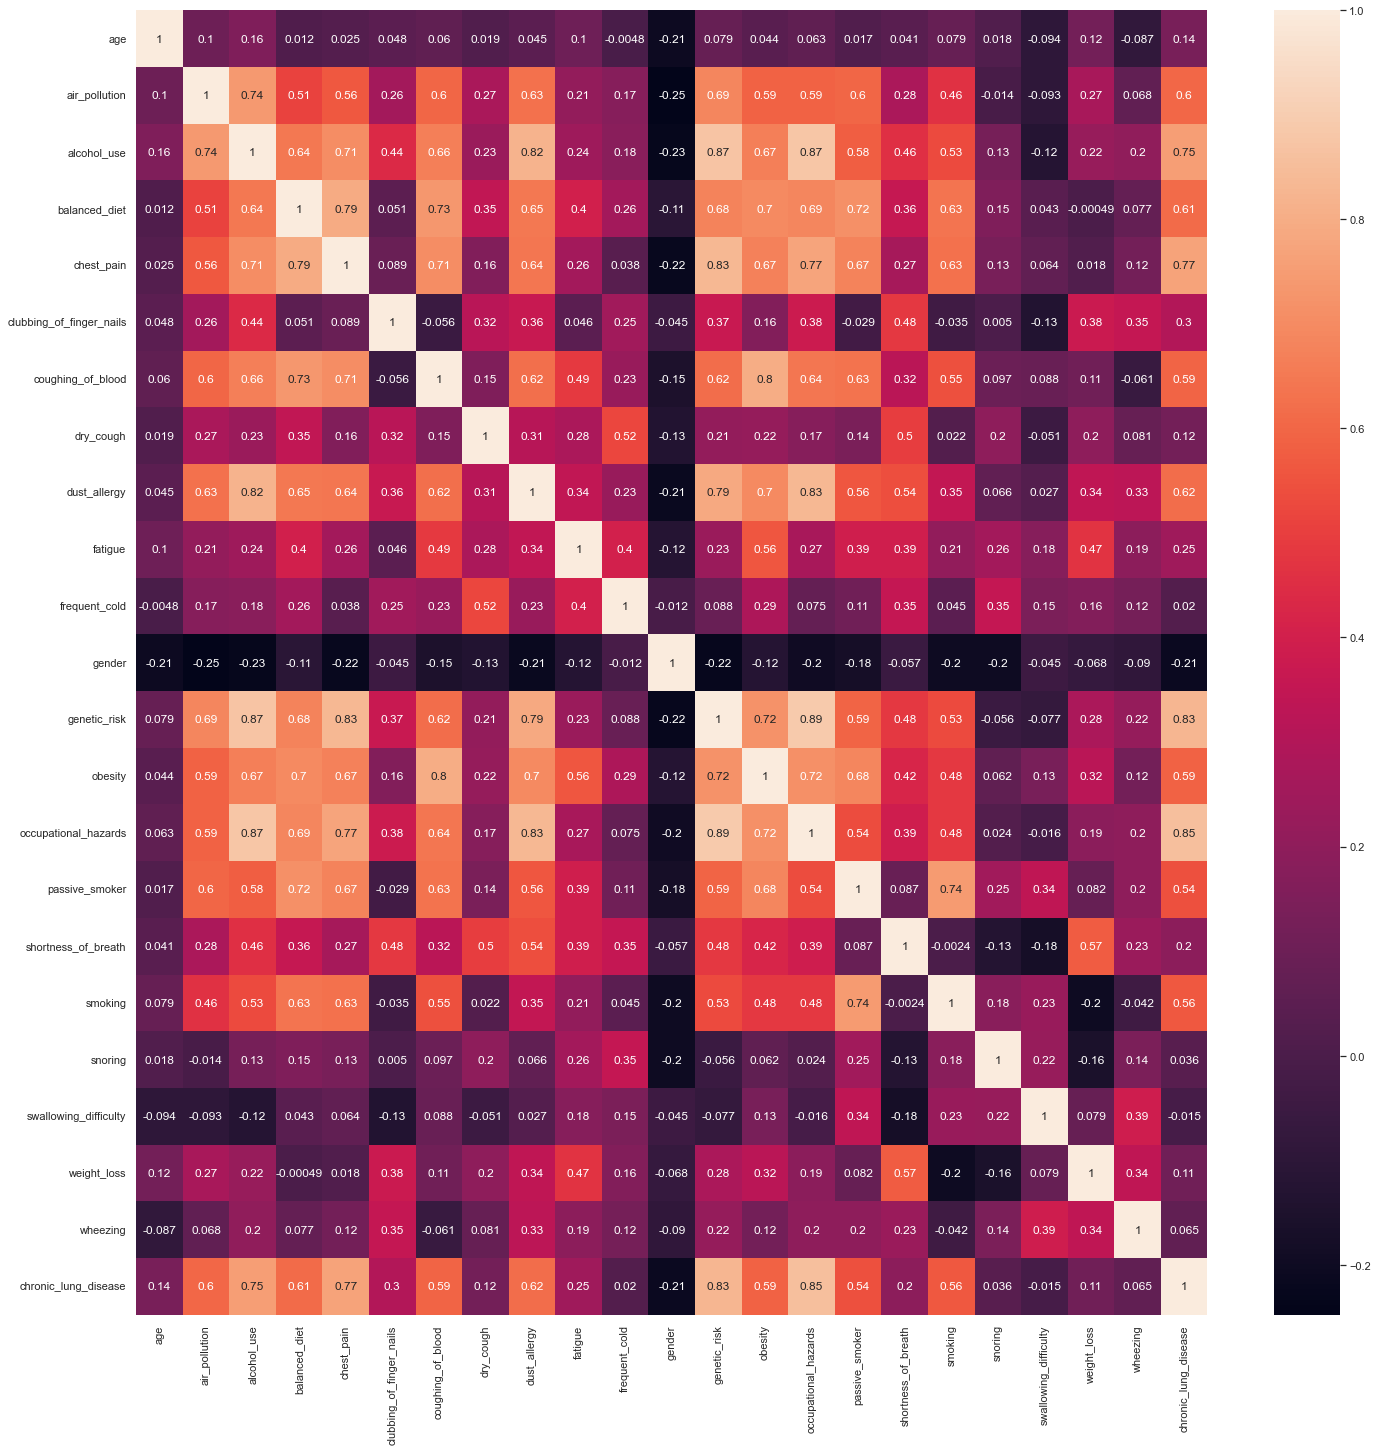

In [224]:
plt.subplots(figsize = (24, 24))
sns.heatmap(dataset.corr(), annot = True)

Alcohol use and dust allergy have high coorelaion,
Alcohol use and occupational hazards have high coorelaion,
Alcohol use and genetic risk have high coorelaion,
Dust allergy and occupational hazards have high coorelaion,
Occupational hazards and genetic risk have high coorelaion,
Occupational hazards and chronic lung disease risk have high coorelaion,
Genetic risk and chronic lung disease risk have high coorelaion,
Genetic risk and chest pain risk have high coorelaion,
Obesity and coughing of blood risk have high coorelaion.

<AxesSubplot:xlabel='occupational_hazards', ylabel='genetic_risk'>

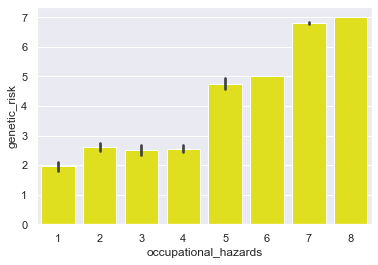

In [225]:
sns.barplot(data=dataset, x="occupational_hazards", y="genetic_risk",color='yellow')

THE GRAPH ABOVE IS SHOWING THE RELATIONSHIP BETWEEN GENETIC RISK AND OCCUPATIONAL HAZARDS

Text(0.5, 1.0, 'Relation between OccuPational Hazards and Gender')

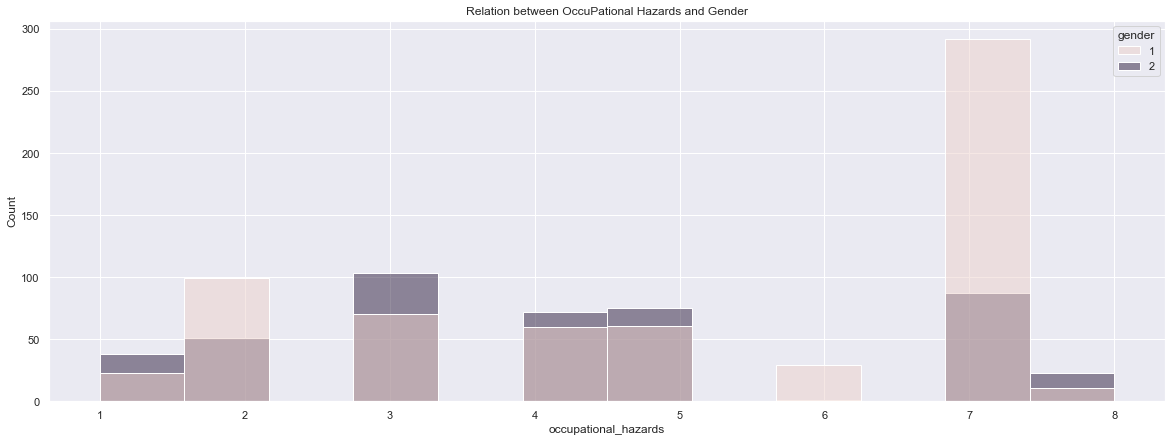

In [226]:
plt.subplots(figsize=(20, 7))

sns.histplot(data=dataset, x=dataset["occupational_hazards"], hue=dataset["gender"])
plt.title("Relation between OccuPational Hazards and Gender")

THE GRAPH ABOVE IS SHOWING THE RELATIONSHIP BETWEEN GENDER AND OCCUPATIONAL HAZARDS

<AxesSubplot:title={'center':'Relation between Obesity and Coughing of Blood'}, xlabel='obesity', ylabel='coughing_of_blood'>

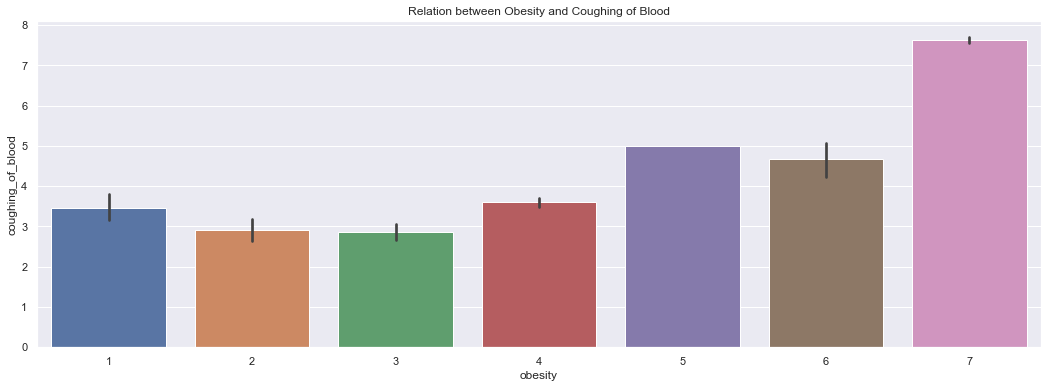

In [227]:
plt.figure(figsize=(18, 6))
plt.title("Relation between Obesity and Coughing of Blood")
sns.barplot(data=dataset, x="obesity", y="coughing_of_blood")

THE GRAPH ABOVE IS SHOWING THE RELATIONSHIP BETWEEN OBESITY AND COUGHING OF BLOOD

<AxesSubplot:title={'center':'Relation between age and alcohol use'}, xlabel='age', ylabel='alcohol_use'>

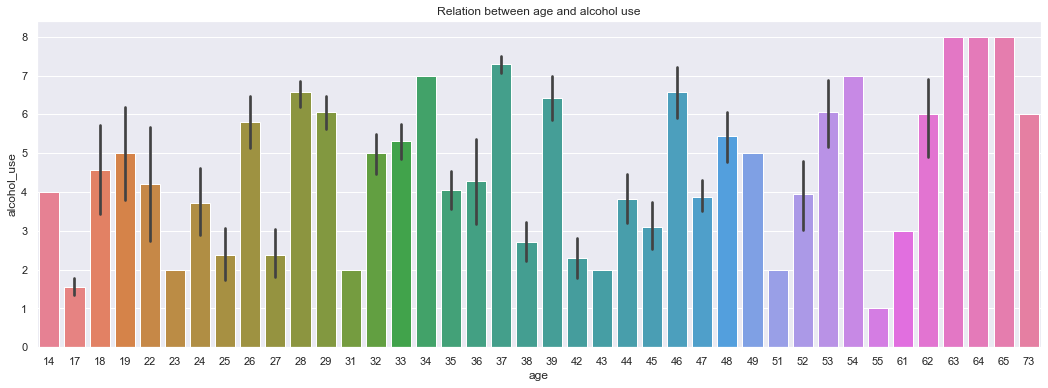

In [228]:
plt.figure(figsize=(18, 6))
plt.title("Relation between age and alcohol use")
sns.barplot(data=dataset, x="age", y="alcohol_use",palette="husl")

THE GRAPH ABOVE IS SHOWING THE RELATIONSHIP BETWEEN AGE AND ALCOHOL USE

<AxesSubplot:title={'center':'alcohol use and dust allergy'}, xlabel='alcohol_use', ylabel='dust_allergy'>

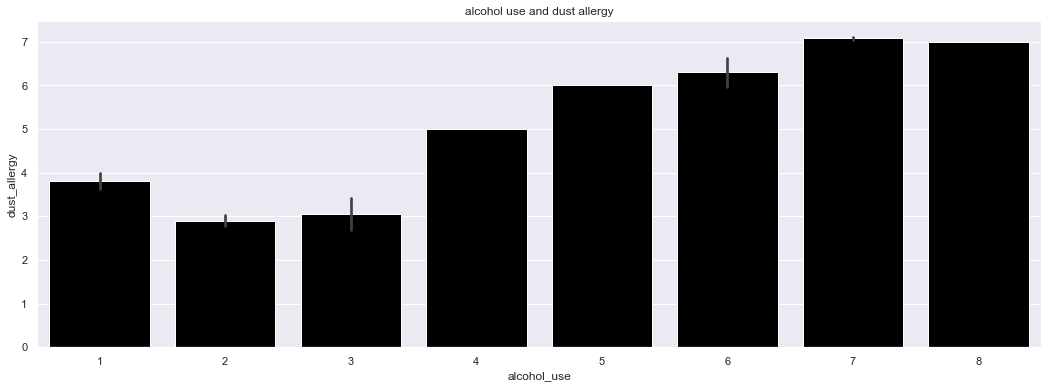

In [229]:
plt.figure(figsize=(18, 6))
plt.title("alcohol use and dust allergy")
sns.barplot(data=dataset, x="alcohol_use", y="dust_allergy",color='black')

THE GRAPH ABOVE IS SHOWING THE RELATIONSHIP BETWEEN DUST ALLERGY AND ALCOHOL USE

<AxesSubplot:title={'center':'occupational hazards and dust allergy'}, xlabel='occupational_hazards', ylabel='dust_allergy'>

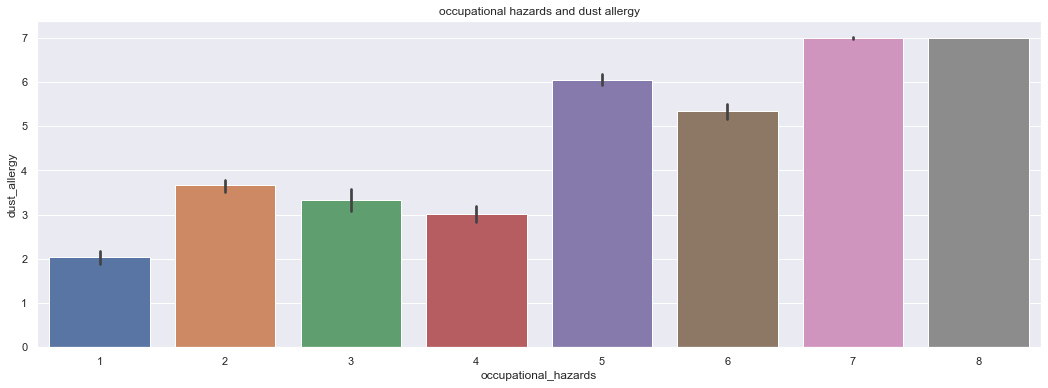

In [230]:
plt.figure(figsize=(18, 6))
plt.title("occupational hazards and dust allergy")
sns.barplot(data=dataset, x="occupational_hazards", y="dust_allergy")

THE GRAPH ABOVE IS SHOWING THE RELATIONSHIP BETWEEN DUST ALLERGY AND OCCUPATIONAL HAZARDS

<AxesSubplot:xlabel='alcohol_use', ylabel='genetic_risk'>

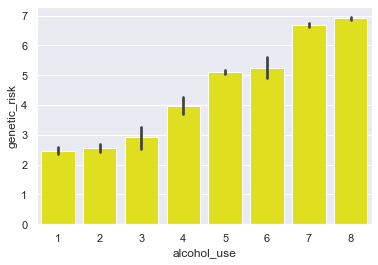

In [231]:
sns.barplot(data=dataset, x="alcohol_use", y="genetic_risk",color='yellow')


THE GRAPH ABOVE IS SHOWING THE RELATIONSHIP BETWEEN ALCOHOL USE AND GENETIC RISK

<AxesSubplot:xlabel='alcohol_use', ylabel='occupational_hazards'>

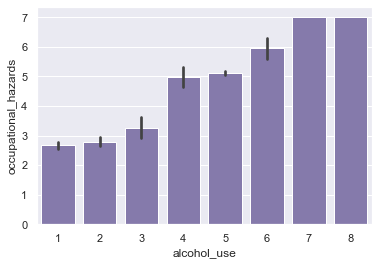

In [232]:
sns.barplot(data=dataset, x="alcohol_use", y="occupational_hazards",color='m')


THE GRAPH ABOVE IS SHOWING THE RELATIONSHIP BETWEEN ALCOHOL USE AND OCCUPATIONAL HAZARDS

<AxesSubplot:xlabel='chronic_lung_disease', ylabel='occupational_hazards'>

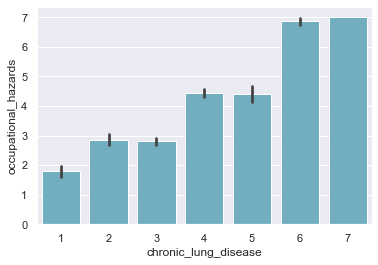

In [233]:
sns.barplot(data=dataset, x="chronic_lung_disease", y="occupational_hazards",color='c')

THE GRAPH ABOVE IS SHOWING THE RELATIONSHIP BETWEEN CHRONIC LUNG DISEASE AND OCCUPATIONAL HAZARDS

<AxesSubplot:xlabel='chronic_lung_disease', ylabel='genetic_risk'>

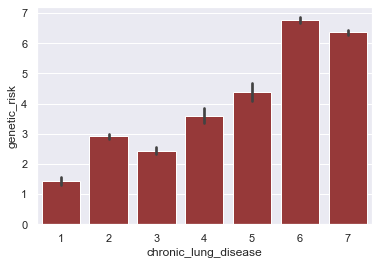

In [234]:
sns.barplot(data=dataset, x="chronic_lung_disease", y="genetic_risk",color='brown')

THE GRAPH ABOVE IS SHOWING THE RELATIONSHIP BETWEEN CHRONIC LUNG DISEASE AND GENETIC RISK


<AxesSubplot:xlabel='chest_pain', ylabel='genetic_risk'>

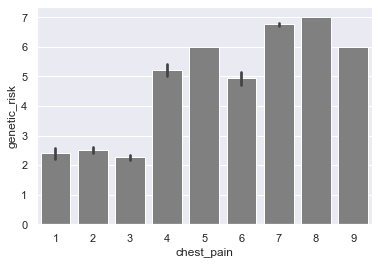

In [235]:
sns.barplot(data=dataset, x="chest_pain", y="genetic_risk",color='grey')

THE GRAPH ABOVE IS SHOWING THE RELATIONSHIP BETWEEN CHEST PAIN AND GENETIC RISK

In [236]:
dataset.replace(to_replace = "Low" , value = 0 , inplace = True)
dataset.replace(to_replace = "Medium" , value = 1 , inplace = True)
dataset.replace(to_replace = "High" , value = 2 , inplace = True)
dataset

,age,air_pollution,alcohol_use,balanced_diet,chest_pain,clubbing_of_finger_nails,coughing_of_blood,dry_cough,dust_allergy,fatigue,...,obesity,occupational_hazards,passive_smoker,shortness_of_breath,smoking,snoring,swallowing_difficulty,weight_loss,wheezing,chronic_lung_disease
0,33,2,4,2,2,1,4,3,5,3,...,4,4,2,2,3,4,3,4,2,2
1,17,3,1,2,2,2,3,7,5,1,...,2,3,4,7,2,2,6,3,8,2
2,35,4,5,6,4,4,8,7,6,8,...,7,5,3,9,2,2,1,7,2,4
3,37,7,7,7,7,5,8,7,7,4,...,7,7,7,3,7,5,4,2,1,7
4,46,6,8,7,7,2,9,2,7,3,...,7,7,7,4,8,3,4,2,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,23,4,2,2,2,2,4,3,3,1,...,4,4,4,4,2,1,4,3,2,3
1091,24,3,2,1,3,2,6,1,2,2,...,1,1,2,2,4,1,4,1,3,1
1092,35,2,1,2,2,2,1,2,2,3,...,3,1,4,5,2,2,3,4,1,1
1093,38,5,2,5,1,3,3,4,3,1,...,2,1,5,1,2,2,1,1,1,3


### DATA MODELING

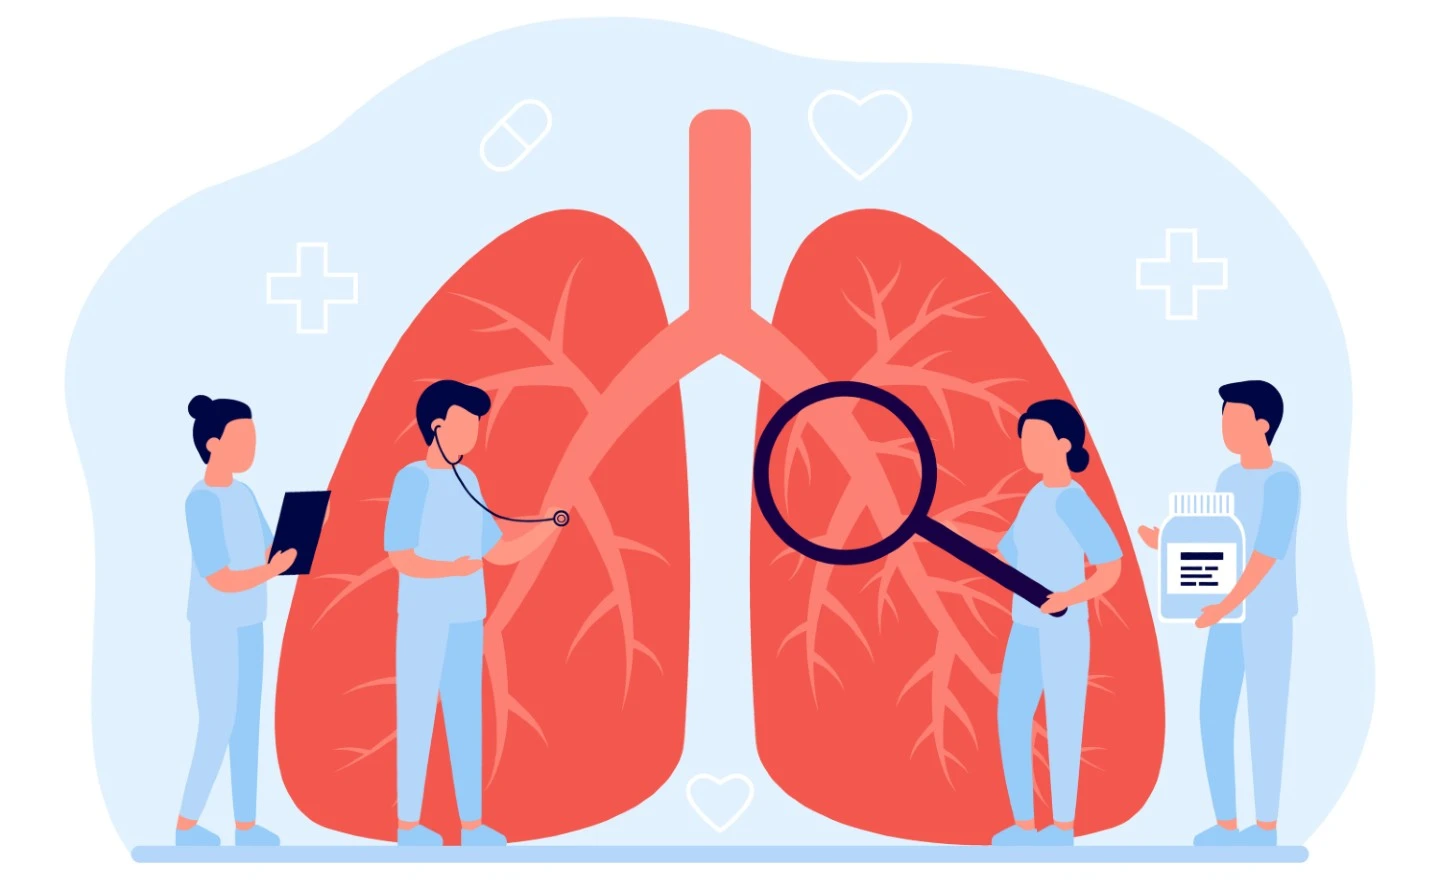

In [237]:
X = dataset.drop('level', axis = 1)
y = dataset['level']

In [238]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [239]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [240]:
predictions = model.predict(X_test)

In [241]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       112
           1       0.98      0.97      0.98       108
           2       1.00      1.00      1.00       109

    accuracy                           0.98       329
   macro avg       0.98      0.98      0.98       329
weighted avg       0.98      0.98      0.98       329



#### CONFUSION MATRIX

[[110   2   0]
 [  3 105   0]
 [  0   0 109]]


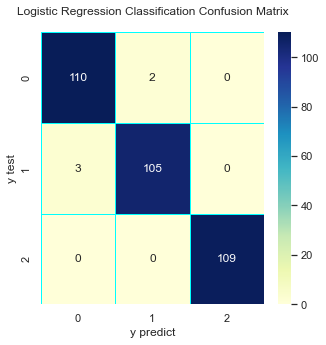

In [242]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
confusionMatrix = confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusionMatrix, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')

plt.show()


In [243]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, predictions)

In [244]:
model
score_logreg = model.score(X_test, y_test)
print(score_logreg)

0.9848024316109423


#### ANALYSIS OF Y-TEST AND PREDICED VALUES FOR TEST DATA  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


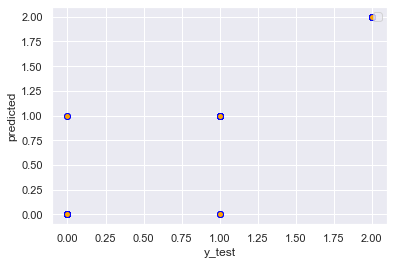

In [245]:
plt.scatter(y_test,predictions,color='orange',edgecolors='blue')
plt.xlabel('y_test')
plt.ylabel('predicted')
plt.legend()
plt.show()


#### AS,Y_Test and predicted value for test data is same.

#### so,this model is accurate. 